In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
yemek = pd.DataFrame({
    'Order ID':[255334, 736425, 853635, 134546, 953624],
    'Restaurant': ['Thai Basil', 'Rice and Bones', 'La Burrita', 'Stuffed Inn', 'Yifang'],
    'Amount Paid': [15.89, 5.00, 13.29, 12.50, 4.89],
    'Wait Time': [12.76, 2.34, 7.59, 20.55, 0.64],
    'Calories': [565.39, 475.13, 373.89, 360.23, 332.21]
})
yemek

,Order ID,Restaurant,Amount Paid,Wait Time,Calories
0,255334,Thai Basil,15.89,12.76,565.39
1,736425,Rice and Bones,5.00,2.34,475.13
2,853635,La Burrita,13.29,7.59,373.89
3,134546,Stuffed Inn,12.50,20.55,360.23
4,953624,Yifang,4.89,0.64,332.21


Medyan: 7.59
Ortalama: 8.776
IQR: 10.42


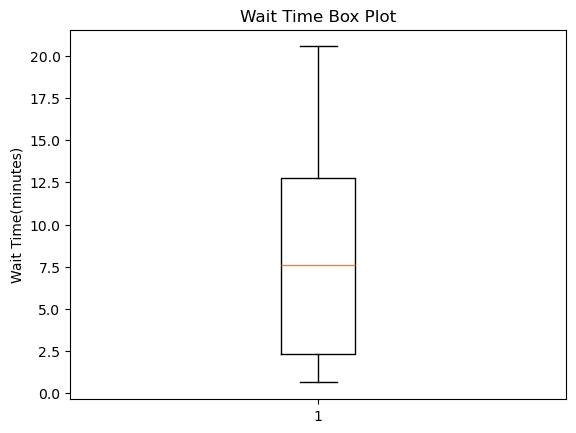

In [3]:
#Box plot değerlerini hesaplama
#2023 sınav 2. soru örneği

def boxplot_stats(df, column):
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    median = df[column].median()
    mean = df[column].mean()

    print(f"Medyan: {median}")
    print(f"Ortalama: {mean}")
    print(f"IQR: {iqr}")

    #Box plot çiz
    plt.boxplot(df[column])
    plt.title(f'{column} Box Plot')
    plt.ylabel(f'{column}(minutes)')
    plt.show()
    
boxplot_stats(yemek, 'Wait Time')

In [4]:
dogs = pd.DataFrame({
    'id': [123,456,821,198,3,42],
    'age':[4,3,6,4,2,5],
    'color':['brown', 'grey', 'golden', 'grey', 'black', 'brown'],
    'fur':['shaggy', 'short', 'curly', 'shaggy', 'curly', 'shaggy'],
    'name':['odie', 'gabe', 'samosa', 'gabe', 'bob barker', 'odie']
}).set_index('id')

dogs

,age,color,fur,name
id,,,,
123,4,brown,shaggy,odie
456,3,grey,short,gabe
821,6,golden,curly,samosa
198,4,grey,shaggy,gabe
3,2,black,curly,bob barker
42,5,brown,shaggy,odie


In [5]:
# select name from dogs where age in (select max(age) from dogs)
dogs.loc[dogs['age'] == dogs['age'].max(), 'name']

id
821    samosa
Name: name, dtype: object

In [6]:
# select sum(age) from dogs a right join (select fur, count(*) from dogs group by fur having count(*) > 2) b on a.fur=b.fur

#fur_counts = dogs.groupby('fur').size()
fur_counts = dogs.fur.value_counts()
#Örnek çıktı :
# shaggy   3
# curly    2
# short    1

# en fazla tekrar eden fur türlerinin indekslerini(fur türlerini) al
dogs[dogs['fur'].isin(fur_counts[fur_counts > 2].index)]['age'].sum()

13

In [7]:
# Yukarıdaki sorunun tek satırda çözümü
dogs[dogs.fur == dogs.fur.value_counts().index[0]].age.sum()

13

In [8]:
employee = pd.DataFrame({
    'name':['James', 'Jane', 'Melissa', 'Ed', 'Neil'],
    'age':[30,40,32,67,43],
    'score':['90%','95%','100%','82%','87%'],
    'age_missing_data':[30.0,40.0,32.0,67.0,float('nan')],
    'income':[100000,80000,55000,62000,120000],
    'gender':['Male','Female','Female','Male','Male']
})
employee

,name,age,score,age_missing_data,income,gender
0,James,30,90%,30.0,100000,Male
1,Jane,40,95%,40.0,80000,Female
2,Melissa,32,100%,32.0,55000,Female
3,Ed,67,82%,67.0,62000,Male
4,Neil,43,87%,NaN,120000,Male


In [9]:
# employee DataFrame’i Şekil 1’den Şekil 2’deki duruma getirilmiştir. Bu sonucu elde etmek için gerekli kodu
#yazınız. Son sütun için hesaplama şu şekilde yapılmıştır. Erkekler için : income / age *0.25 Kadınlar için :
#income / age *0.30. B

def bonus(row):
    if row['gender'] == 'Male':
        return (row['income'] / row['age'])*0.25
    else:
        return (row['income'] / row['age'])*0.30

employee['bonus']=employee.apply(bonus, axis=1)
employee

,name,age,score,age_missing_data,income,gender,bonus
0,James,30,90%,30.0,100000,Male,833.333333
1,Jane,40,95%,40.0,80000,Female,600.000000
2,Melissa,32,100%,32.0,55000,Female,515.625000
3,Ed,67,82%,67.0,62000,Male,231.343284
4,Neil,43,87%,NaN,120000,Male,697.674419


In [10]:
# employee veri setindeki en yüksek maaşa sahip çalışanın adı
#employee[employee.income == employee.income.max()].name
employee.loc[employee['income'] == employee['income'].max(), 'name']

4    Neil
Name: name, dtype: object

In [11]:
# employee veri setindeki kırk yaş ve üzeri çalışanlar
employee[employee.age > 40].name

3      Ed
4    Neil
Name: name, dtype: object

In [12]:
# dogs dataframe'indeki en yaşlı köpeğin ismini bulan kod parçacığı
#dogs[dogs.age == dogs.age.max()].name.iloc[0]
dogs.loc[ dogs['age'] == dogs['age'].max(), 'name' ].iloc[0]

'samosa'

Medyan: 12.5

Q1(25.percentile) değeri: 5.0

Q2(75.percentile) değeri: 13.29


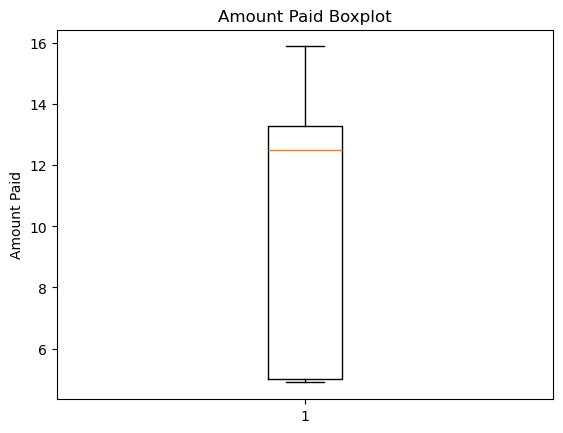

In [13]:
#(15p) YemekSepeti DataFrame'inde 'Amount Paid' sütunu için aşağıdaki istatistikleri hesaplayınız:
# Medyan değeri
# Q1
# Q3
# IQR değeri
# box-plot grafiği ile gösterimi
def amount_paid_stats(df, column):
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1 
    median = df[column].median()

    print(f'Medyan: {median}')
    print(f'\nQ1(25.percentile) değeri: {q1}')
    print(f'\nQ2(75.percentile) değeri: {q3}')

    plt.boxplot(df[column])
    plt.ylabel(f'{column}')
    plt.title(f'{column} Boxplot')
    plt.show()

amount_paid_stats(yemek, 'Amount Paid')
    

In [14]:
# employee Dataframe'ine yeni bir 'performance_bonus' sütunu ekleyin. Hesaplamalar şu şekilde yapılacaktır:
# Eğer skor %90 üzerindeyse: income*0.15
# Eğer skor %80-%89 arasındaysa: income*0.10
# Diğer tüm sütunlar için: income*0.05
# Not: score sütunundaki % işaretini kaldırıp sayısal değere dönüştürmeniz gerekecektir.
def performance_bonus(row):
    if row['score'] >= 90:
        return row['income']*0.15
    elif row['score'] >= 80:
        return row['income']*0.10
    else:
        return row['income']*0.05
employee['score'] = employee['score'].str.replace('%','').astype(float)
employee['performance_bonus'] = employee.apply(performance_bonus, axis=1)

In [15]:
employee

,name,age,score,age_missing_data,income,gender,bonus,performance_bonus
0,James,30,90.0,30.0,100000,Male,833.333333,15000.0
1,Jane,40,95.0,40.0,80000,Female,600.000000,12000.0
2,Melissa,32,100.0,32.0,55000,Female,515.625000,8250.0
3,Ed,67,82.0,67.0,62000,Male,231.343284,6200.0
4,Neil,43,87.0,NaN,120000,Male,697.674419,12000.0


In [16]:
# 'dogs' DataFrame'inde 'fur' tipine göre gruplandırma yapıp, her bir gruptaki köpek sayısını bulunuz ve sayıya göre azalan şekilde sıralayınız.
# Sadece 1'den fazla köpeği olan fur tiplerini gösteriniz.

#fur_counts = dogs.fur.value_counts()
#fur_counts[fur_counts > 1]

#fur_counts = dogs.groupby('fur').size().sort_values(ascending=True)
#fur_counts[fur_counts > 1]

#Tek satırda aşağıdaki şekilde de yazılabilir:
dogs.groupby('fur').size()[dogs.groupby('fur').size() > 1].sort_values(ascending=True)


fur
curly     2
shaggy    3
dtype: int64

In [17]:
# employee DataFrame'inde eksik değer içeren satırları tespit ediniz ve bu satırları aşağıdaki kurallara göre doldurunuz:
# age_missing_data sütunundaki eksik değerleri, aynı cinsiyetteki kişilerin yaş ortalaması ile doldurunuz
# Yeni bir sütun ekleyerek ('data_complete'), hangi satırlarda orijinal değer, hangi satırlarda doldurulmuş değer olduğunu belirtiniz.

#Eksik değerleri kontrol et
employee['age_missing_data'].isna()

employee['data_complete'] = 'Original'
employee.loc[employee['age_missing_data'].isna(), 'data_complete'] = 'Filled'

#Eksik değerleri her cinsiyet için kendi yaş ortalamasıyla dolduralım
employee['age_missing_data'] = employee['age_missing_data'].fillna(employee.groupby('gender')['age_missing_data'].transform('mean')).round()
employee

,name,age,score,age_missing_data,income,gender,bonus,performance_bonus,data_complete
0,James,30,90.0,30.0,100000,Male,833.333333,15000.0,Original
1,Jane,40,95.0,40.0,80000,Female,600.000000,12000.0,Original
2,Melissa,32,100.0,32.0,55000,Female,515.625000,8250.0,Original
3,Ed,67,82.0,67.0,62000,Male,231.343284,6200.0,Original
4,Neil,43,87.0,48.0,120000,Male,697.674419,12000.0,Filled


In [18]:
result = dogs.groupby('color').agg({'age':'mean'}).rename(columns={'age':'avg_age'})

# result['count'] = dogs.groupby('color').size()
result['count'] = dogs.color.value_counts()
result[result['count'] >= 2].sort_values('avg_age', ascending=True)

,avg_age,count
color,,
grey,3.5,2
brown,4.5,2


In [24]:
print(dogs['name'].unique().size)

4


In [25]:
print(dogs['name'].nunique())

4
